In [1]:
#models are requried
import numpy as np
import pandas as pd
import operator
import os,sys
import re,string

In [2]:
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [3]:
x=[]
y=[]
#read the documnets form all groups of news
for category in os.listdir("Dataset/Newsgroup/20_newsgroups"):
    for document in os.listdir("Dataset/Newsgroup/20_newsgroups/"+category):
        with open("Dataset/Newsgroup/20_newsgroups/"+category+'/'+document,"r") as f:
            x.append((document,f.read()))
            y.append(category)

In [4]:
print(type(x))
print(type(x[0]))
print(type(x[0][0]))
print(type(x[0][1]))
print(type(y))
print(x[10])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>
('51127', "Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!noc.near.net!news.centerline.com!uunet!olivea!sgigate!sgiblab!adagio.panasonic.com!nntp-server.caltech.edu!keith\nFrom: keith@cco.caltech.edu (Keith Allan Schneider)\nNewsgroups: alt.atheism\nSubject: Re: >>>>>>Pompous ass\nMessage-ID: <1pi9jkINNqe2@gap.caltech.edu>\nDate: 2 Apr 93 21:01:40 GMT\nReferences: <1ou4koINNe67@gap.caltech.edu> <1p72bkINNjt7@gap.caltech.edu> <93089.050046MVS104@psuvm.psu.edu> <1pa6ntINNs5d@gap.caltech.edu> <1993Mar30.205919.26390@blaze.cs.jhu.edu> <1pcnp3INNpom@gap.caltech.edu> <1pdjip$jsi@fido.asd.sgi.com>\nOrganization: California Institute of Technology, Pasadena\nLines: 14\nNNTP-Posting-Host: punisher.caltech.edu\n\nlivesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n\n>>>How long does it [the motto] have to stay around before it becomes the\n>>>default?  .

In [5]:
#split the data into train and test
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y)

In [40]:
#making a dictionary of words with their corresponding frquencey
dic={}
for i in range(len(x_train)):
    #look [1] beacuse [0] is  name of the documnets and [1] is text in documnts
    word=x_train[i][1]
    #split the text into word
    strip = re.split(r'\W+',word)
    #iterate over each word
    for w in strip:
        #we will no include strop word , alpha numeric, punctuations or irrelevent word
        if not(w.isalpha()) or w in stop_word or len(w)<2:
            continue
        if w in dic:
            dic[w]+=1
        else:
            dic[w]=1

In [39]:
#sorting the dictionary on the basis of frequency of words in descending order
sort_d = sorted(dic.items(),key=operator.itemgetter(1),reverse=True)

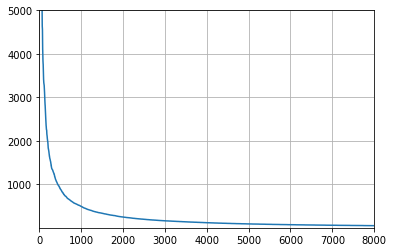

In [10]:
import matplotlib.pyplot as plt
features = sort_d
ans1=[]
ans2=[]
for i in range(len(features)):
    ans1.append(i)
    ans2.append(features[i][1])
plt.plot(ans1,ans2)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()

In [38]:
#decide to make top 2500 words with max frequency as our feature
ans1 = [features[i][0] for i in range(2500)]

In [15]:
#making x_train dataset
# no. of rows is equivalent to rows in x_train and column is equal to lenght of ans

x_train_data = np.zeros([len(x_train),len(ans1)],int)
for i in range(len(x_train)):
    word =x_train[i][1].lower()
    word =re.split(r'\W+',word)
    
    #iterate over the word
    for j in word:
        #we add the frequency corresponding to that word only which are ans1
        if j in ans1:
            x_train_data[i][ans1.index(j)]+=1

In [16]:
#making x_test
x_test_data  = np.zeros([len(x_test),len(ans1)],int)
for i in range(len(x_test)):
    word =x_test[i][1].lower()
    word = re.split(r'\W+',word)
    #iterate over the each word
    for j in word:
        # add the frequency corresponding to that word only which in our ans1
        if j in ans1:
            x_test_data[i][ans1.index(j)]+=1

In [17]:
#print the x_train and x_test
print(x_train_data)
print("----------------------------------------")
print(x_test_data)

[[10  0  4 ...  0  0  0]
 [12  0  3 ...  0  0  0]
 [10  0  2 ...  0  0  0]
 ...
 [ 7  0  2 ...  0  0  0]
 [ 7  0  1 ...  0  0  0]
 [13  0  4 ...  0  0  0]]
----------------------------------------
[[ 9  0  5 ...  0  0  0]
 [ 9  0  4 ...  0  0  0]
 [ 6  0  1 ...  0  0  0]
 ...
 [ 5  0  3 ...  0  0  0]
 [10  0  2 ...  0  0  0]
 [ 3  0  3 ...  0  0  0]]


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix,accuracy_score

clf=MultinomialNB()
clf.fit(x_train_data,y_train)
y_pred =clf.predict(x_test_data)
print("Score of training data",clf.score(x_train_data,y_train))
print("Score of test data",clf.score(x_test_data,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Score of training data 0.8903113956124559
Score of test data 0.858
[[199   0   0   0   1   0   0   4   2   0   1   0   1   0   1   0   0   2
    0  42]
 [  0 175  15  12  11   6   6   2   1   0   0   0   2   2   0   0   0   0
    0   0]
 [  0   3 232  13   2   9   2   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   4 210  18   1   2   0   1   0   0   0   1   0   0   0   0   0
    0   0]
 [  0   2   2  18 225   2   3   0   1   0   0   1   3   0   0   0   0   0
    0   0]
 [  0  28  36   8   9 169   1   0   1   0   0   0   1   1   2   0   0   0
    0   0]
 [  0   1   0   4   1   0 254   6   1   0   0   0   2   0   0   0   0   0
    1   0]
 [  0   0   0   2   0   0  10 223   9   0   3   0   4   0   0   0   1   0
    0   1]
 [  0   0   0   0   0   0   5   9 254   1   0   0   0   0   2   0   0   0
    0   1]
 [  0   0   0   0   0   0   2   2   4 222  18   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   1   3   3   4   6 239   0   0   0   0   0   0   0
    1   0

## Own scratch code of Naive bayes for text classification

In [28]:
#making a dictionary for implementaing naive bayes

def fit(x_train_data,y_train):
    count ={}
    total_word=0
    y_train = np.array(y_train)
    # total no of documents is calculated
    count["total_doc"]=len(y_train)
    classess = set(y_train)
    for i in classess:
        temp =0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_data[y_train==i]
        #finding lenght of data with category corresponding to i
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over ans1
        for feature in ans1:
            #calculating total word in feature
            l=(x_train_with_i[:,ans1.index(feature)]).sum()
            count[i][feature]=l
            temp+=1
        #total word in that class
        count[i]["word_in_class"]=temp
        #lenght of data with y_train beloning to specific classes
        count[i]["lenght"]=temp2
    
    return count

In [29]:
def probability(x_test,dic,classess):
    prob = np.log(dic[classess]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classess].keys())
    # -2 is done becaues there will be "length" and "Word in classess" preseent in features
    for j in range(len(feature)-2):
        xj=x_test[j]
        #if frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #extra addition part is laplace correction
            num = dic[classess][feature[j]]+1
            den=dic[classess]["word_in_class"]+len(dic[classess].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob


In [30]:
#best classess return from here
def predict_for_single(x_test,dic):
    first_run =True
    classess=dic.keys()
    for i in classess:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class


In [34]:
def predict(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [35]:
def score(y_test,y_pred):
    count =0
    for i in range(len(y_pred)):
        if y_pred[i]==y_test[i]:
            count+=1
    return count/len(y_pred)

In [36]:
dictionary = fit(x_train_data,y_train)
y_pred = predict(x_test_data,dictionary)

In [37]:
print("Score on testing data",score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Score on testing data 0.7
[[204   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4
    7  38]
 [  1 202   0   1   0   6   0   0   0   0   0   9   0   0   0   0   1   3
    9   0]
 [  0  34 150   3   0  52   0   0   0   0   0  10   0   0   0   0   0   1
   11   0]
 [  0  39   0 169   5   1   0   0   0   0   0  15   1   0   0   0   0   2
    6   0]
 [  0  57   1  20 131   6   0   0   0   0   0  29   1   0   1   0   0   2
    9   0]
 [  0  36   2   0   0 205   0   0   0   0   0   5   0   0   1   0   0   1
    6   0]
 [  0  24   0  13   1   1 136   4   0   0   0  13   2   0   7   0   4  11
   52   2]
 [  1   1   0   0   0   1   3 158   0   1   0   2   4   2   3   0  12  17
   48   0]
 [  9   0   0   0   0   0   2  20  79   0   0   7   0   1   7   0  18  57
   70   2]
 [  0   0   0   0   0   0   0   1   0 191   3   0   0   0   2   0   2  27
   21   1]
 [  0   1   0   0   0   0   0   0   0   6 216   0   1   0   0   0   0  19
   14   0]
 [  0   1   0   0   0   0   0   0   0  